In [1116]:


# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import sklearn
import math
from matplotlib.pyplot import thetagrids

import separator

sep = separator.SeparateText()

# print versions of libraries
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"sklearn version: {sklearn.__version__}")

numpy version: 1.24.4
pandas version: 2.1.3
sklearn version: 1.3.2


# LINEAR REGRESSION

Linear regression model prediction:
$\theta$ - symbol means Theta fyi
$\theta_0$ - bias (intercept)
$\theta_1$ ... $\theta_n$ - weights of features
$ \hat{y} $ - predicted value
$ x_i $ - i-th feature value
\
$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n $


It can be written also as this:
$ \theta $ - vector of parameters. (including both bias $\theta_0$ and weights $\theta_1$ ... $\theta_n$)
$ x $ - vector of feature values, from $ x_0 $ to $ x_n $, where $ x_0 $ is always equal to 1
$\theta \cdot x$ - dot product of vectors $\theta$ and $x$, meaning $ \theta_0 x_0 + \theta_1 x_1 + ... + \theta_n x_n $
$ h_\theta $ - hypothesis function, using parameters $\theta$
\
$ \hat{y} = h_\theta(x) = \theta^T \cdot x $


Linear regression using normal equation, which gives you result directly. All you need to pass in the complete datasets and it will spit out the result. Note however, that computational complexity grows non-linearly with the number of features. Therefore, with large datasets it is going to be slow and it is better to use gradient descent instead.
$\hat{\theta}$ is value of $\theta$ that minimizes the cost function
$ y $ is vector of target values, containing $ y^{(1)} $ to $ y^{(m)} $
\
$ \hat{\theta} = (X^T \cdot X)^{-1} \cdot X^T \cdot y $

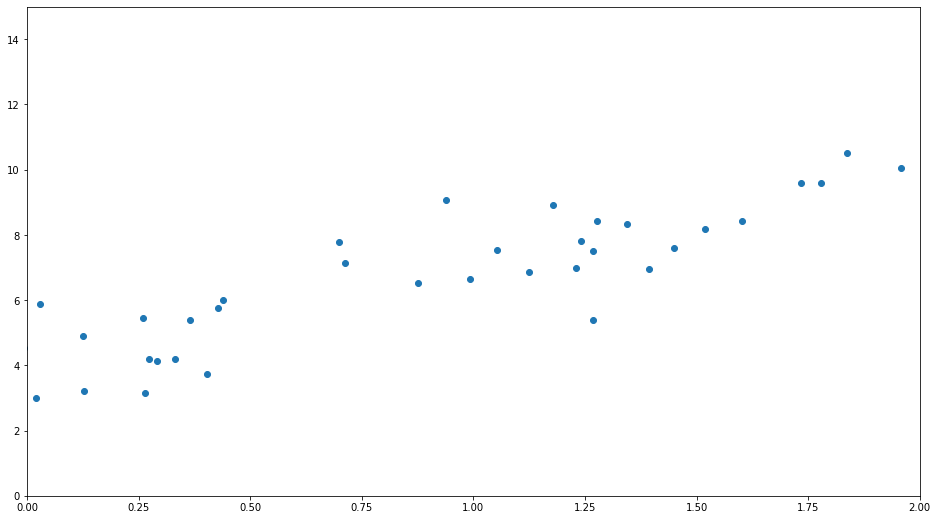

[[-4.09390231]
 [-1.31614413]
 [ 0.71357429]
 [ 0.27323287]
 [ 0.36600462]]
[[-9.05303752]
 [-0.82560717]
 [ 7.15173268]
 [ 4.18702017]
 [ 5.40506858]]


In [1117]:
# create coordinates datapoints which will create some kind of linear distribution
X = 2 * np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.figure(figsize=(16, 9))
plt.scatter(X, y)
plt.axis((0, 2, 0, 15))
plt.show()

print(X[:5], y[:5], sep="\n")

\
$ \hat{\theta} = (X^T \cdot X)^{-1} \cdot X^T \cdot y $

In [1118]:
# give all features at position 0 value of 1, based on the specification at the description of linear regression
X_with1_at0index = np.c_[np.ones((100, 1)), X]

# compute inverse of a matrix & dot product, using the formula above
theta_best = np.linalg.inv(X_with1_at0index.T.dot(X_with1_at0index)).dot(X_with1_at0index.T).dot(y)
X_with1_at0index

array([[ 1.00000000e+00, -4.09390231e+00],
       [ 1.00000000e+00, -1.31614413e+00],
       [ 1.00000000e+00,  7.13574286e-01],
       [ 1.00000000e+00,  2.73232874e-01],
       [ 1.00000000e+00,  3.66004615e-01],
       [ 1.00000000e+00, -5.54125360e-01],
       [ 1.00000000e+00, -1.00223237e+00],
       [ 1.00000000e+00, -2.47909424e+00],
       [ 1.00000000e+00,  2.58939507e-01],
       [ 1.00000000e+00,  2.11352123e+00],
       [ 1.00000000e+00,  2.83129939e-02],
       [ 1.00000000e+00, -1.52159048e+00],
       [ 1.00000000e+00,  2.91918382e-01],
       [ 1.00000000e+00,  2.92763416e+00],
       [ 1.00000000e+00, -4.08047480e-01],
       [ 1.00000000e+00, -2.47321080e+00],
       [ 1.00000000e+00,  4.39630630e-01],
       [ 1.00000000e+00,  1.17920680e+00],
       [ 1.00000000e+00,  1.73444139e+00],
       [ 1.00000000e+00,  1.39445178e+00],
       [ 1.00000000e+00,  3.32181079e-01],
       [ 1.00000000e+00, -1.66752069e+00],
       [ 1.00000000e+00, -1.96654430e+00],
       [ 1.

In [1119]:
print("Best bias and weight:\n", theta_best)

Best bias and weight:
 [[3.90069807]
 [2.97387514]]


In [1120]:
# now we can make predictions

# create new datapoints, just for example
X_few_features = np.array([[0], [2]])

# adjust again the datapoints, so they will have value of 1 at position 0
X_few_features_with_1_at_first_indexes = np.c_[np.ones((2, 1)), X_few_features]

# make predictions
y_predict_few_features = X_few_features_with_1_at_first_indexes.dot(theta_best)

# based on the bias and weights we computed above, we can make predictions on y datapoints, which in this case output 3.9 and 9.6. This means that first datapoint x with corresponding prediction y will have coordinates (0, 3.9) and second (2, 9.6)
print(X_few_features,
      X_few_features_with_1_at_first_indexes,
      y_predict_few_features,
      sep="\n")

[[0]
 [2]]
[[1. 0.]
 [1. 2.]]
[[3.90069807]
 [9.84844834]]


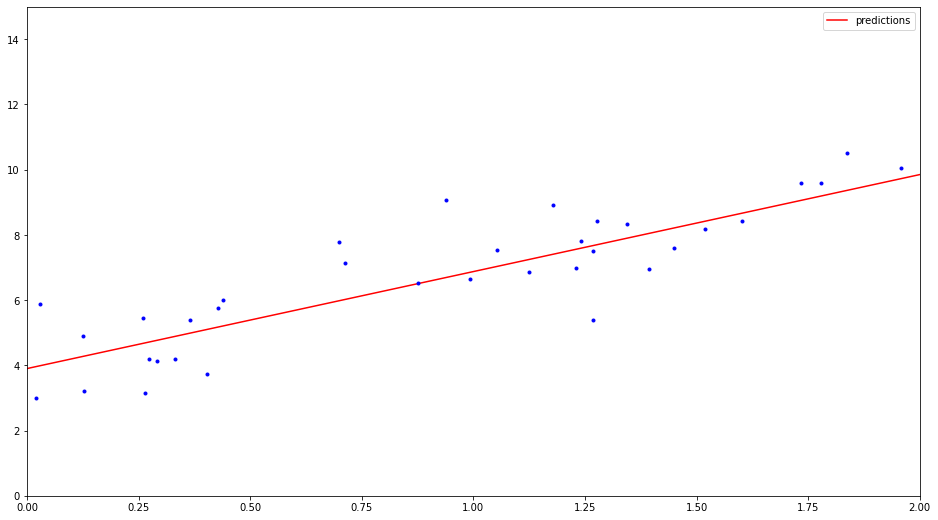

In [1121]:
# plot models prediction
plt.figure(figsize=(16, 9))
plt.plot(X_few_features, y_predict_few_features, "r-", label="predictions")
plt.plot(X, y, "b.")
plt.axis((0, 2, 0, 15))  # set scale of x and y axes with list
plt.legend()
plt.show()

In [1122]:
# compare with sklearn linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# bias 3.9 and weights 2.8
lin_reg.intercept_, lin_reg.coef_  # this will display the same result as we computed manually as theta_best

(array([3.90069807]), array([[2.97387514]]))

In [1123]:
# sklearn's predictions on the same little data. Results are the same.
lin_reg.predict(X_few_features)

array([[3.90069807],
       [9.84844834]])

In [1124]:
# compare sklearn model with mathematical model from scratch
np.allclose(lin_reg.predict(X_few_features), y_predict_few_features)

True

# GRADIENT DESCENT

Gradient descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of gradient descent is to tweak parameters iteratively in order to minimize a cost function.

Suppose you are lost in the mountains in a dense fog; you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what gradient descent does: it measures the local gradient of the error function with regards to the parameter vector $\theta$, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!

Concretely, you start by filling $\theta$ with random values (this is called random initialization), and then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum.

When using gradient descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

![Gradient descent](../images/gradient_descend_1.jpg)


![Gradient descent](../images/gradient_descend_2.png)

It is important to choose right learning rate. If it is too small, then the algorithm will have to go through many iterations to converge, which will take a long time. On the other hand, if it is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution.

# BATCH GRADIENT DESCENT

To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$. In other words, you need to calculate how much the cost function will change if you change $\theta_j$ just a little bit. This is called a partial derivative. It is like asking “what is the slope of the mountain under my feet if I face east?” and then asking the same question facing north (and so on for all other dimensions, if you can imagine a universe with more than three dimensions). Equation below computes the partial derivative of the cost function with regards to parameter $\theta_j$, noted $\frac{\partial}{\partial \theta_j}MSE(\theta)$.

PARTIAL DERIVATIVE OF THE COST FUNCTION (example of MSE here)
\
$ \frac{\partial}{\partial \theta_j}MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m} (\theta^T \cdot x^{(i)} - y^{(i)})x_j^{(i)} $


GRADIENT VECTOR
Instead of computing these partial derivatives individually for each model parameter $\theta_j$, you can use Equation below to compute them all in one go. The gradient vector, noted $\nabla_\theta MSE(\theta)$, contains all the partial derivatives of the cost function (one for each model parameter).

$ \nabla_\theta MSE(\theta) = \begin{pmatrix} \frac{\partial}{\partial \theta_0}MSE(\theta) \\ \frac{\partial}{\partial \theta_1}MSE(\theta) \\ \vdots \\ \frac{\partial}{\partial \theta_n}MSE(\theta) \end{pmatrix} = \frac{2}{m} X^T \cdot (X \cdot \theta - y)$

Notice that this formula involves calculations over the full training set $X$, at each Gradient Descent step! This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of training data at every step (actually, Full Gradient Descent would probably be a better name). As a result it is terribly slow on very large training sets (but we will see much faster Gradient Descent algorithms shortly). However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation.

$\nabla_\theta$ - denotes the gradient with respect to the parameters $\theta$
$MSE(\theta)$ - is the cost function, Mean Squared Error in this case
$\theta = \begin{bmatrix} \theta_0 & \theta_1 & \theta_2 & \hdots & \theta_n \end{bmatrix}$ - parameter vector, which for example in case of linear regression has bias $\theta_0$ and weights $\theta_1$ to $\theta_n$

The gradient is a vector containing the partial derivatives of the cost function with respect to each parameter. Each element in the vector represents the sensitivity of the cost function to a small change in the corresponding parameter.

$\frac{\partial}{\partial \theta_0}MSE(\theta)$ - partial derivative of the cost function with respect to parameter $\theta_0$
$\frac{\partial}{\partial \theta_1}MSE(\theta)$ - partial derivative of the cost function with respect to parameter $\theta_1$
$\frac{\partial}{\partial \theta_n}MSE(\theta)$ - partial derivative of the cost function with respect to parameter $\theta_n$

This vector is used in optimization algorithms like gradient descent. The update rule for each parameter in the iteration of an optimization algorithm might look like:
$\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j}MSE(\theta)$
$\alpha$ Alpha (also used as Eta $\eta$) is the learning rate and $j$ ranges from 0 to $j$. I guess index $j$ can be actually marked as $n$ because we are talking here about the $j$th/$n$th parameter associated with a given feature, if I'm not mistaken. 
This process iteratively adjusts the parameters to minimize the Mean Squared Error.


#### Question TL

Is it true, that if we have for example 3 parameters in a machine learning problem and we use $\nabla_\theta MSE(\theta)$ formula above, does it mean that the cost function is 3 dimensional? Meaning a gradient descend will be a vector, pointing in the direction which will be result of $\theta$?

#### Answered by GPT-3.5

Yes, that's correct. If you have three parameters $(\theta_0, \theta_1, \theta_2)$, in a machine learning problem, and you compute the gradient of the cost function using the formula you provided, then the cost function is three-dimensional. The resulting gradient vector would indeed be in three-dimensional space, representing the direction of steepest ascent in the cost function's surface.

In more general terms:
If you have $n$ parameters, $(\theta_0, \theta_1, \theta_n_-_1)$, the cost function is $n$-dimensional.
The gradient vector $\nabla_\theta MSE(\theta)$ is also $n$-dimensional, representing the direction of steepest ascent in the cost function's surface.
Each element in the gradient vector corresponds to the partial derivative of the cost function with respect to the corresponding parameter. The gradient vector points in the direction of the steepest ascent in the $n$-dimensional space of the cost function.

Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting $\nabla_\theta MSE(\theta)$ from $\theta$. This is where the learning rate $\eta$ (Eta) comes into play: multiply the gradient vector by $\eta$ to determine the size of the downhill step.

$ \theta^{(next step)} = \theta - \eta  \nabla_\theta MSE(\theta) $

In [1125]:
eta = 0.1  # this is learning rate
n_iterations = 1_000
m = 100 # number of observations
theta = np.random.randn(2, 1)  # random initialization of parmaters

for iteration in range(n_iterations):
    # compute partial derivatives  in one go and get the gradient vector.
    gradients = 2 / m * X_with1_at0index.T.dot(X_with1_at0index.dot(theta) - y)
    
    # update parameters
    theta = theta - eta * gradients

# see again that the resulting bias and weights are the same as we computed above many times with different methods
theta

array([[3.90069807],
       [2.97387514]])

In [1126]:
theta_batchGD_parm0 = []
theta_batchGD_parm1 = []
def plot_batch_gradient_descent(theta__, eta__, visualise=False):
    """
    
    :param theta__: parameters 
    :param eta__: learning rate
    :return: 
    """
    m = len(X_with1_at0index)
    plt.plot(X, y, "bx") # plot blue x points
    n_iterations = 1000
    
    for iteration in range(n_iterations):
        
        # plot the line every xth iteration
        if iteration % 2 == 0:
            y_predict = X_few_features_with_1_at_first_indexes.dot(theta__)
            style = "b-" if iteration > 0 else "r--" # red is the first line, blue is the rest
            plt.plot(X_few_features, y_predict, style)
        
        # compute gradient vector
        gradients = 2 / m * X_with1_at0index.T.dot(X_with1_at0index.dot(theta__) - y)
        
        if visualise:
            # used for plotting of progress of theta parameter/s
            theta_batchGD_parm0.append(theta__[0])
            theta_batchGD_parm1.append(theta__[1])
        
        # update parameters
        theta__ = theta__ - eta__ * gradients
        
    print(f"Theta best with {eta__}lr\n", theta__)
    
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis((0, 2, 0, 15))
    plt.title(r"$\eta = {}$".format(eta__), fontsize=16)

Theta best with 0.02lr
 [[3.90069807]
 [2.97387514]]
Theta best with 0.1lr
 [[3.90069807]
 [2.97387514]]
Theta best with 0.3lr
 [[ 3.27095736e+195]
 [-1.88692969e+197]]


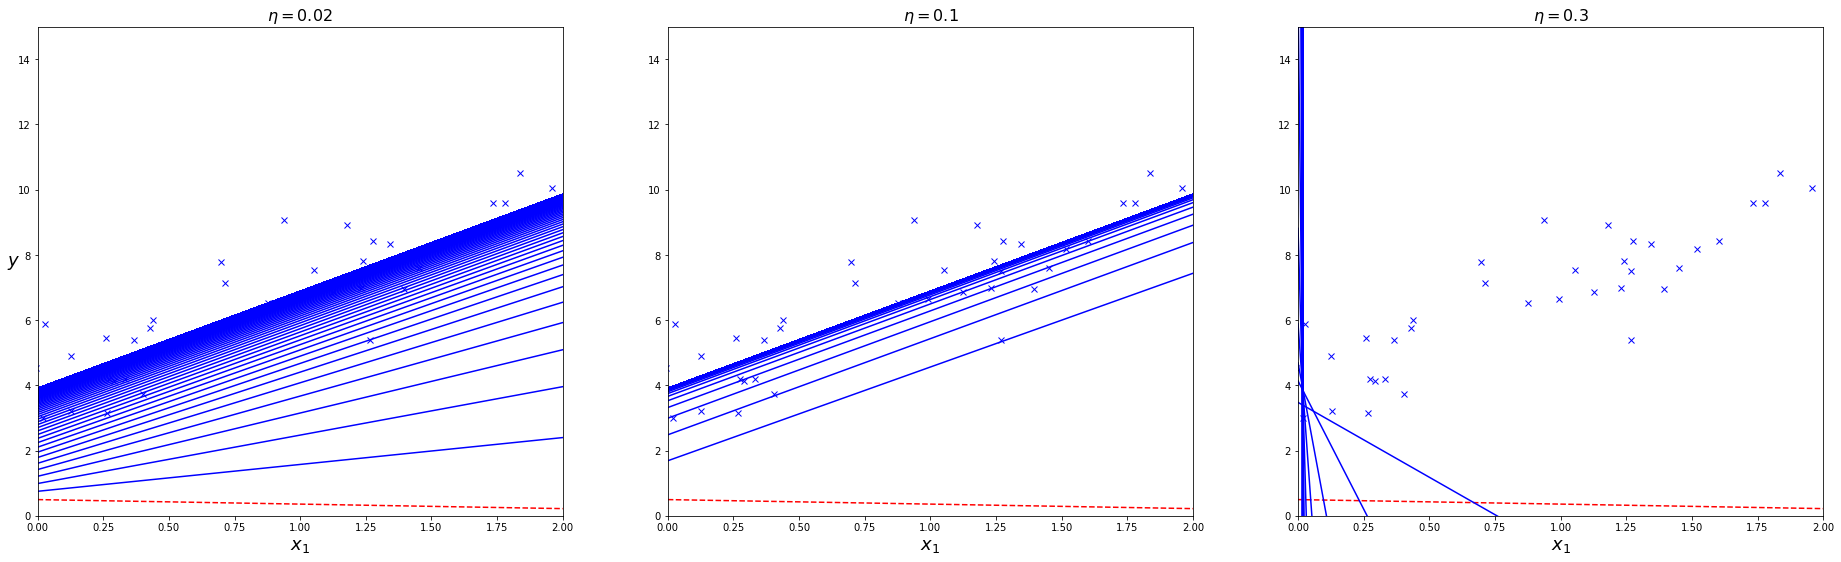

In [1127]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization of parameters

plt.figure(figsize=(32, 9))
plt.subplot(131)
plot_batch_gradient_descent(theta, eta__=0.02, visualise=True)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132)
plot_batch_gradient_descent(theta, eta__=0.1)
plt.subplot(133)
plot_batch_gradient_descent(theta, eta__=0.3)
plt.show()

# plot below will show us how learning changes based on size of learning rate. On the left side, the learning rate is too small, so it will take a longer time to converge. In the middle, the learning rate is just right, so it will converge in a reasonable amount of time. On the right side, the learning rate is too high, so it will diverge.
# compared to stochastic gradient descend, this batch gradient descend is very systematic and goes seamlessly to the minimum, as you see on the lines below (provided of course, there is correct learning rate)

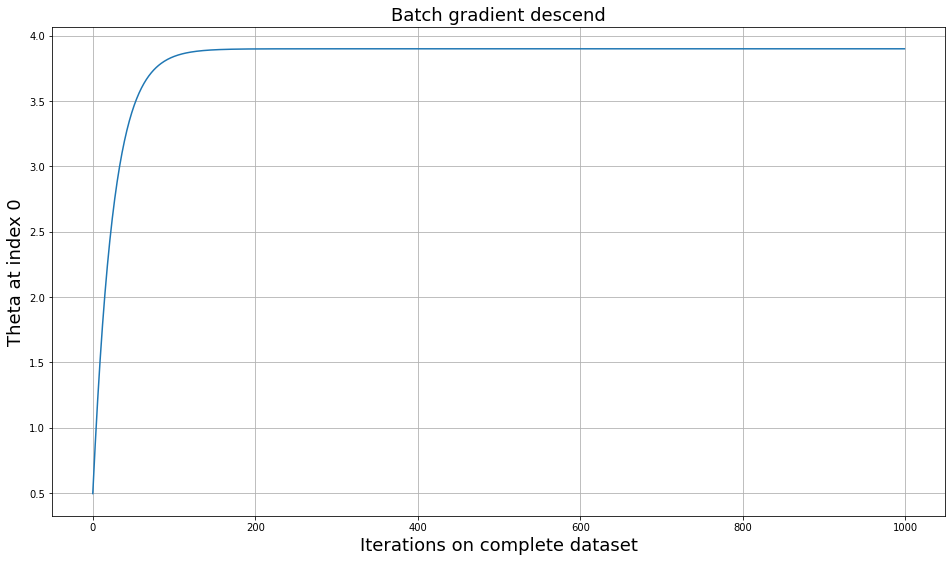

In [1128]:
def plot_theta_progress(title, theta_container, set_axis=False, axis=None):
    plt.figure(figsize=(16, 9))
    plt.grid()
    plt.ylabel("Theta at index 0", fontsize=18)
    plt.xlabel("Iterations on complete dataset", fontsize=18)
    if set_axis:
        plt.axis(axis)
    plt.title(title, fontsize=18)
    plt.plot(theta_container)
    plt.show()
    
    
plot_theta_progress("Batch gradient descend", theta_batchGD_parm0)

 # STOCHASTIC GRADIENT DESCENT
 The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm.).
 
On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal.
    
 When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.
 
Therefore, randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is called simulated annealing, because it resembles the process of annealing in metallurgy where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

In [1129]:
m = len(X_with1_at0index)
np.random.seed(42)
m

100

Theta best
 [[3.86286773]
 [2.95079248]]


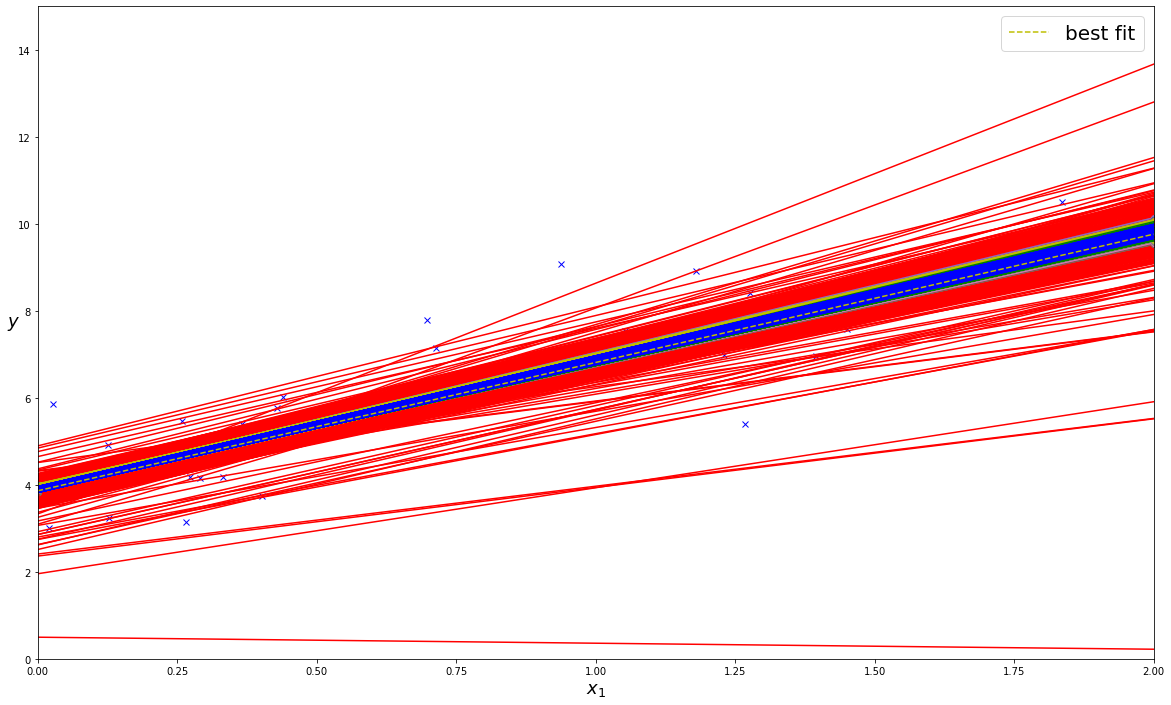

In [1130]:
def make_plt_lines_colorful(epoch, n_epochs):
    """
    This function will return different color for each each basket of epochs
    
    :param epoch: current epoch
    :param n_epochs: total number of epochs
    """

    colors = ["r-", "o-", "y-", "g-", "b-"]
    epochs = [n_epochs*0.166, n_epochs * 0.332, n_epochs * 0.498, n_epochs * 0.664, n_epochs*83]
    
    if epoch <= math.floor(epochs[0]):
        return colors[0]
    elif epoch < math.floor(epochs[1]):
        return colors[1]
    elif epoch < math.floor(epochs[2]):
        return colors[2]
    elif epoch < math.floor(epochs[3]):
        return colors[3]
    elif epoch < math.floor(epochs[4]):
        return colors[4]


def learning_schedule(t):
    # basically the higher the t, the lower the learning rate. This means that if you gonna input t as epoch, the learning rate will be lower and lower
    t0, t1 = 5, 50  # learning schedule hyperparameters
    return t0 / (t + t1)

theta_SGD_parm0 = []
theta_SGD_parm1 = []

def plot_stochastic_gradient_descend(theta__):
    plt.figure(figsize=(20, 12))
    m = len(X_with1_at0index)
    plt.plot(X, y, "bx") # plot blue x points
    n_epochs = 50

    for epoch in range(n_epochs):
        for i in range(m):
            theta_SGD_parm0.append(theta__[0]) # just for visualisation
            theta_SGD_parm1.append(theta__[1]) # just for visualisation
            
            y_predict_ = X_few_features_with_1_at_first_indexes.dot(theta__)
            style = make_plt_lines_colorful(epoch, n_epochs)
            plt.plot(X_few_features, y_predict_, style)

            # take random instance from the training set
            random_index = np.random.randint(m)
            xi = X_with1_at0index[random_index:random_index + 1]
            yi = y[random_index:random_index + 1]
            
            # compute gradient vector and update parameters
            gradients = 2 * xi.T.dot(xi.dot(theta__) - yi)
            eta = learning_schedule(epoch * m + i) # learning rate
            theta__ = theta__ - eta * gradients
            
    y_predict_ = X_few_features_with_1_at_first_indexes.dot(theta__)                
    plt.plot(X_few_features, y_predict_, "y--", label="best fit")
    print(f"Theta best\n", theta__)
    plt.legend(fontsize=20)
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.axis((0, 2, 0, 15))
    plt.show()

plot_stochastic_gradient_descend(theta__=theta)

# You see that the lines are more random, but eventually they will all converge to a single solution. However, due to their stochastic (i.e., random) nature, they will never settle at the minimum. Instead, they will keep oscillating around the minimum. By convention we iterate by rounds of m iterations; each round is called an epoch. While the Batch Gradient Descent code iterated 1,000 times through the whole training set, this code goes through the training set only 50 times and reaches a fairly good solution:

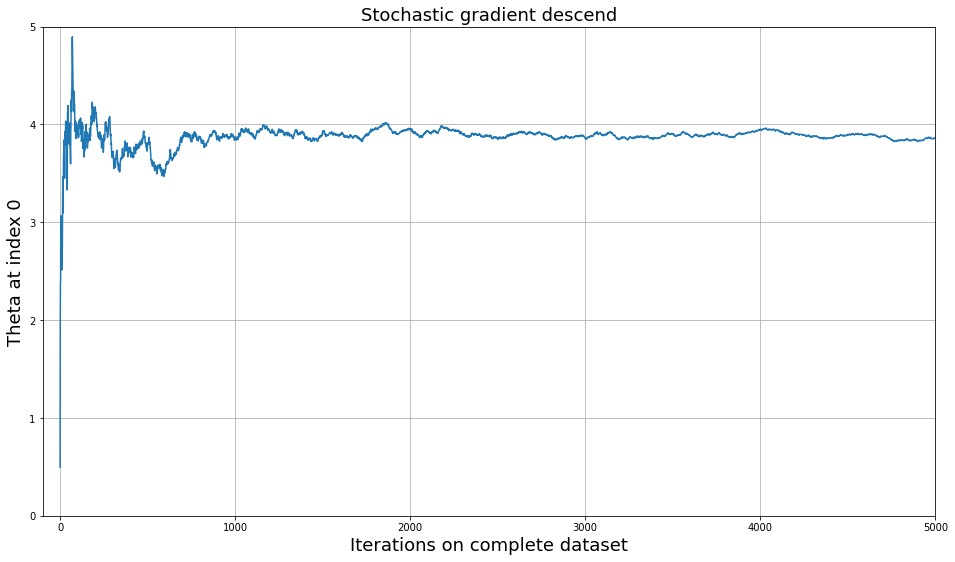

In [1131]:
plot_theta_progress("Stochastic gradient descend",
                    theta_SGD_parm0,
                    set_axis=True,
                    axis=(-100, 5000, 0, 5))

# Below you see how SGD due to its randomness jumps all around. Also you see that since we are using learning schedule, the learning rate is getting lower and lower, which means that the the curve is getting smoother with more iterations.

# MINI-BATCH GRADIENT DESCENT
Instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

The algorithm’s progress in parameter space is less erratic than with SGD, especially with fairly large mini-batches. As a result, Mini-batch GD will end up walking around a bit closer to the minimum than SGD. But, on the other hand, it may be harder for it to escape from local minima (in the case of problems that suffer from local minima, unlike Linear Regression as we saw earlier). Figure below shows the paths taken by the three Gradient Descent algorithms in parameter space during training. They all end up near the minimum, but Batch GD’s path actually stops at the minimum, while both Stochastic GD and Mini-batch GD continue to walk around. However, don’t forget that Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule.

Theta best
 [[3.90398156]
 [2.97686455]]


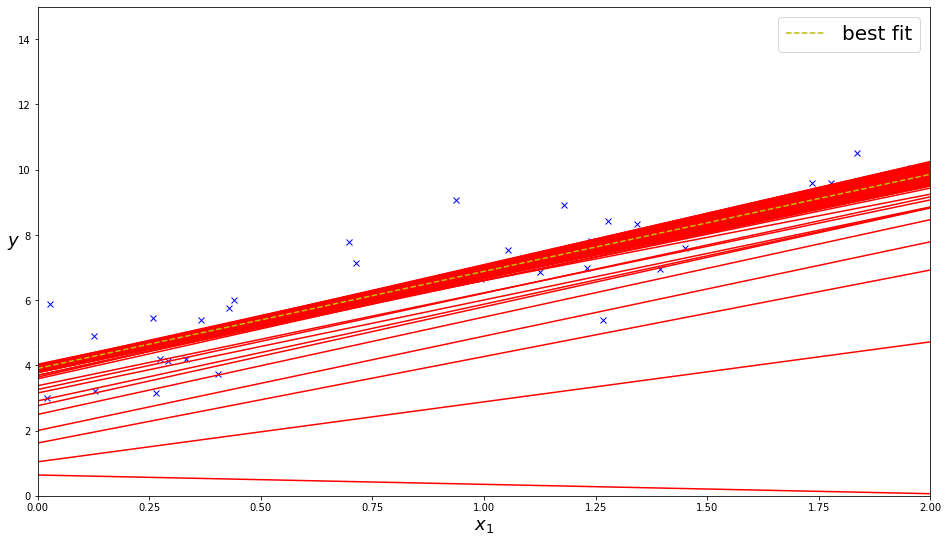

In [1132]:
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 100, 1000
def learning_schedule_(t):
    return t0 / (t + t1)

theta_minibatchGD_parm0 = []
theta_minibatchGD_parm1 = []

def plot_minibatch_gradient_descend(theta__):
    plt.figure(figsize=(16, 9))
    plt.plot(X, y, "bx") # plot blue x points
    
    n_iterations = 500
    minibatch_size = 20
    t = 0
    
    for epoch in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X_with1_at0index[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, minibatch_size): # start, end, step
            theta_minibatchGD_parm0.append(theta__[0]) # just for visualisation
            theta_minibatchGD_parm1.append(theta__[1]) # just for visualisation
            y_predict_ = X_few_features_with_1_at_first_indexes.dot(theta__)
            plt.plot(X_few_features, y_predict_, "r-")
            
            t += 1
            xi = X_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta__) - yi)
            eta = learning_schedule_(t)
            theta__ = theta__ - eta * gradients
            
    y_predict_ = X_few_features_with_1_at_first_indexes.dot(theta__)                
    plt.plot(X_few_features, y_predict_, "y--", label="best fit")
    print(f"Theta best\n", theta__)
    plt.legend(fontsize=20)
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.axis((0, 2, 0, 15))
    plt.show()

plot_minibatch_gradient_descend(theta__=theta)

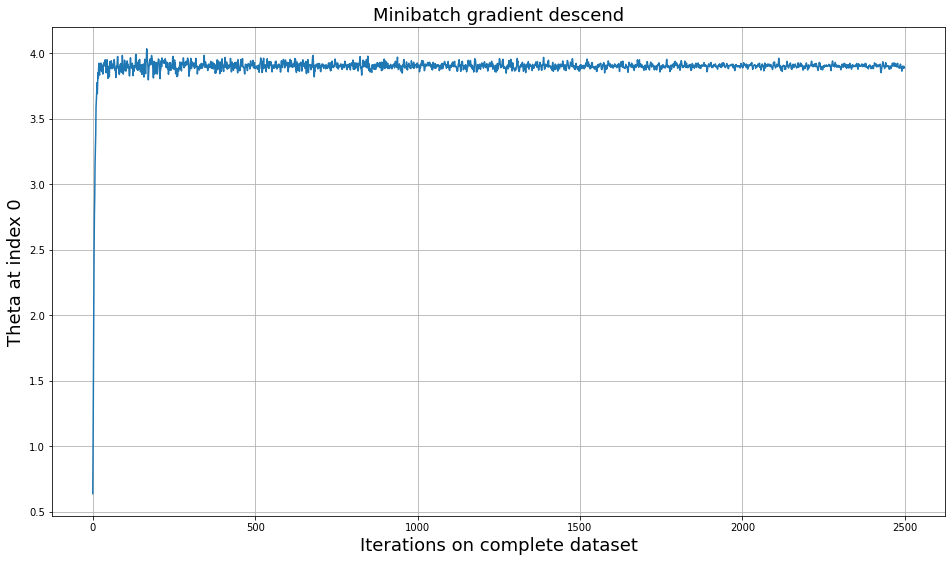

In [1133]:
plot_theta_progress("Minibatch gradient descend",
                    theta_minibatchGD_parm0)

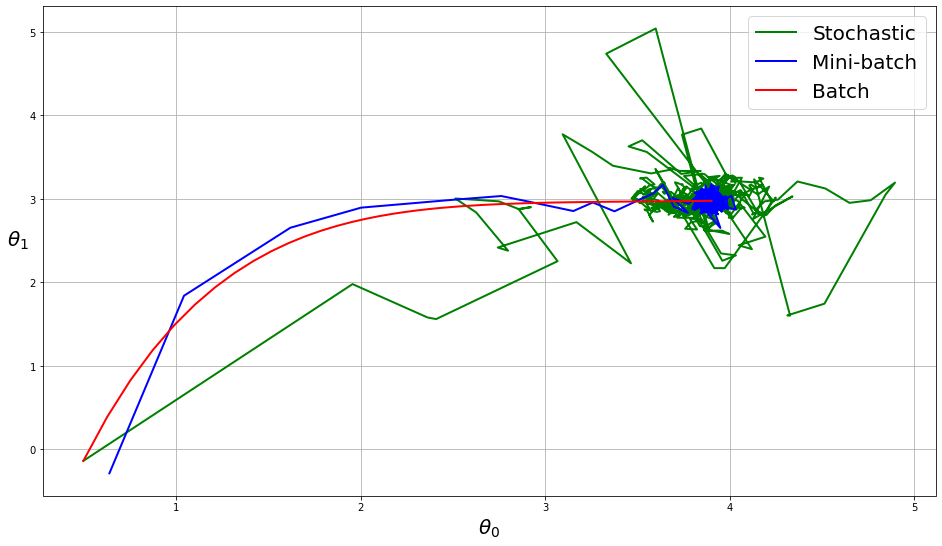

In [1134]:
# compare how the theta parameters change over time. See that random initialization starts somewhere around 0, 0 and moves with time to the best result. But notice, that you can fix a lot the stochastic behaviour by using learning schedule. Try to experiment with learning schedule with both stochastic GD's and you will see that the curve will be much smoother (or rougher).

# Todo: check all the GD's in cells above if there are no mistakes, and then continue with polynomial regression.
# todo: There are incorrect x axis names at plots above (theta over time). Fix it

plt.figure(figsize=(16, 9))
plt.plot(theta_SGD_parm0, theta_SGD_parm1,"g-", linewidth=2, label="Stochastic")
plt.plot(theta_minibatchGD_parm0, theta_minibatchGD_parm1, "b-", linewidth=2, label="Mini-batch")
plt.plot(theta_batchGD_parm0, theta_batchGD_parm1, "r-", linewidth=2, label="Batch")
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.grid()
plt.legend(fontsize=20)
plt.show()

# polynomial regression

i understand this that some function can actually "faltten" the data to the point that linear regression can be used on that 

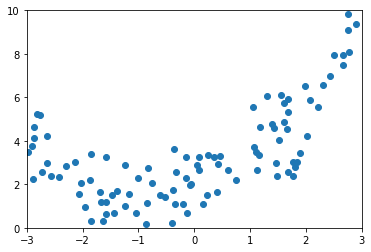

In [1135]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.axis([-3, 3, 0, 10])
plt.show()

In [1136]:
# add a square (second degree polynomial) of each feature in the trainin set as a new feature
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X[0], X_poly[0]

(array([0.45559472]), array([0.45559472, 0.20756655]))

[1.87709174] [[0.84527555 0.50962088]]


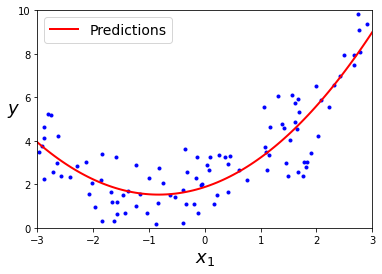

In [1137]:
# X_poly now contains the original feature of X plus the square of this feature.
# Now you can fit a lingear regression model to this extended trainig data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

# this code was copied:
X_few_features = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_few_features)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_few_features, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# learning curves

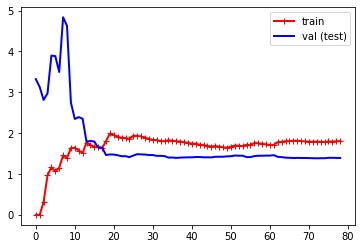

In [1138]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# here is used X_val, but I really belive that they mean X_test
def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors = []
    val_errors = []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val (test)")
    plt.legend()
    plt.show()


lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

# some  example of data that is underfitting.
# model has low error on first few samples and then it goes tits up

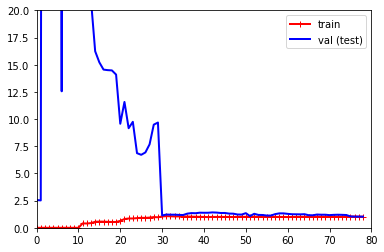

In [1139]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plt.axis([0, 80, 0, 20])
plot_learning_curve(polynomial_regression, X, y)

# some example of overffiting model (test set error is higer than train set)

# regularized linear models

generaly you should not really use plain linear regression model. Instead use one of these regressions (ridge, lasso, elastic net).

# ridge regression

it is a constrained version of linear regression, with focus to have weights as small as possible

In [1140]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.47401801]])

In [1141]:
from sklearn.linear_model import SGDRegressor

# regularization with penalty l2 is actually the same as computing with Ridge
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.46821598])

# lasso regression

it is specific that removes the weights of least important features (sets them to zero)

In [1142]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.42534927])

# elastic net

elastic net is something between ridge regression and lasso regression

In [1143]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])


array([4.432956])

# early stopping

In [1144]:
# basic implementation of early stopping from scratch:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=True)),
    ("std_scaler", StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       warm_start=True,
                       penalty=None,
                       learning_rate="constant",
                       eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1_000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

InvalidParameterError: The 'tol' parameter of SGDRegressor must be a float in the range [0.0, inf) or None. Got -inf instead.

# logistic regression

is actually used for classification problems (logistic regression solo should be able to classify binary labels only i think)

### decision boundaries of log regression

In [ ]:
from sklearn import datasets

# import dataset which contains flowers
iris = datasets.load_iris()
iris.keys()

In [ ]:
# the dataset includes leghts of leaves based on 3 spicies of flower
X = iris["data"]
y = iris["target"]
X[0], y

In [ ]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica else 0
X[:5], y

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)
X_few_features = np.linspace(0, 3, 1000)
print(X_few_features.shape)

X_few_features = X_few_features.reshape(-1, 1)
print(X_few_features.shape)

In [ ]:
X_few_features = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_few_features)
decision_boundary = X_few_features[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y == 0], y[y == 0], "bs")
plt.plot(X[y == 1], y[y == 1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_few_features, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_few_features, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary + 0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [ ]:
log_reg.predict([[1.7], [1.5]])

# when the lengt is more 1.7 it will classify it as virginica, 1.5 will classify as not

# Softmax Regression

soft max regression is just logistic regression, that is able to classify more than binary labels

In [ ]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10 ** 10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 200).reshape(-1, 1),
)
X_few_features = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_few_features)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs")
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

# the plot below might belong to logistic regression section above, nevertheless
#   it should not be as far from softmax regression (as it is actually located in github)

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

In [ ]:
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
X_few_features = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_few_features)
y_predict = softmax_reg.predict(X_few_features)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()